## Using a Dataset to Investigate the Relationship Between High Cholesterol Levels and Risk of Heart Disease

### Adam Trainer, Matthew Zizek, Phoebe Qiu, Rikki Ye

## Introduction
Prior research has shown that several risk factors increase the prevalence of heart attacks and heart diseases, including age and cholesterol levels above 200 mg/dL (Karthick et al., 2022). Therefore, we will be using data from a valid data set to answer the following predictive question; “Can age and cholesterol levels be used to predict if an individual has a heart disease”. The UC Irvine (UCI) Machine Learning Repository contains the Cleveland heart disease dataset that will be used to answer our question (Janosi et al., 1988). The dataset is used by machine learning researchers to analyze algorithms by answering a variety of predictive questions including predicting heart diseases for patients using many health risk predictors. 

## Preliminary exploratory data analysis

In [1]:
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(repr)
library(RColorBrewer)
data <- read_csv("https://github.com/matthewzizek/dsci-100-project/raw/main/data/processed.cleveland.data")

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [8]:
cleveland <- data |>
  select(1, 5, 14) |>
  rename(age = 1, chol = 2, diag = 3)

head(cleveland)
tail(cleveland)

age,chol,diag
<dbl>,<dbl>,<dbl>
67,286,2
67,229,1
37,250,0
41,204,0
56,236,0
62,268,3


age,chol,diag
<dbl>,<dbl>,<dbl>
57,241,1
45,264,1
68,193,2
57,131,3
57,236,1
38,175,0


In [11]:
set.seed(1)

# Splitting the data frame into training and testing datasets
cleveland_split <- initial_split(cleveland, prop = 0.75, strata = diag)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)
head(cleveland_train)
tail(cleveland_train)

cleveland2 <- cleveland_train

cleveland2$diag <- as.character(cleveland2$diag)


for(i in 1:nrow(cleveland2)){
    if(cleveland2[i, 3] != "0") {
        cleveland2[i, 3] <- "presence of disease" 
        } else {
        cleveland2[i, 3] <- "no disease"
    }
    }

head(cleveland2)
tail(cleveland2)

age,chol,diag
<dbl>,<dbl>,<dbl>
37,250,0
56,236,0
44,263,0
54,239,0
64,211,0
58,283,0


age,chol,diag
<dbl>,<dbl>,<dbl>
53,282,3
54,286,3
52,212,3
55,205,3
59,176,3
57,131,3


age,chol,diag
<dbl>,<dbl>,<chr>
37,250,no disease
56,236,no disease
44,263,no disease
54,239,no disease
64,211,no disease
58,283,no disease


age,chol,diag
<dbl>,<dbl>,<chr>
53,282,presence of disease
54,286,presence of disease
52,212,presence of disease
55,205,presence of disease
59,176,presence of disease
57,131,presence of disease


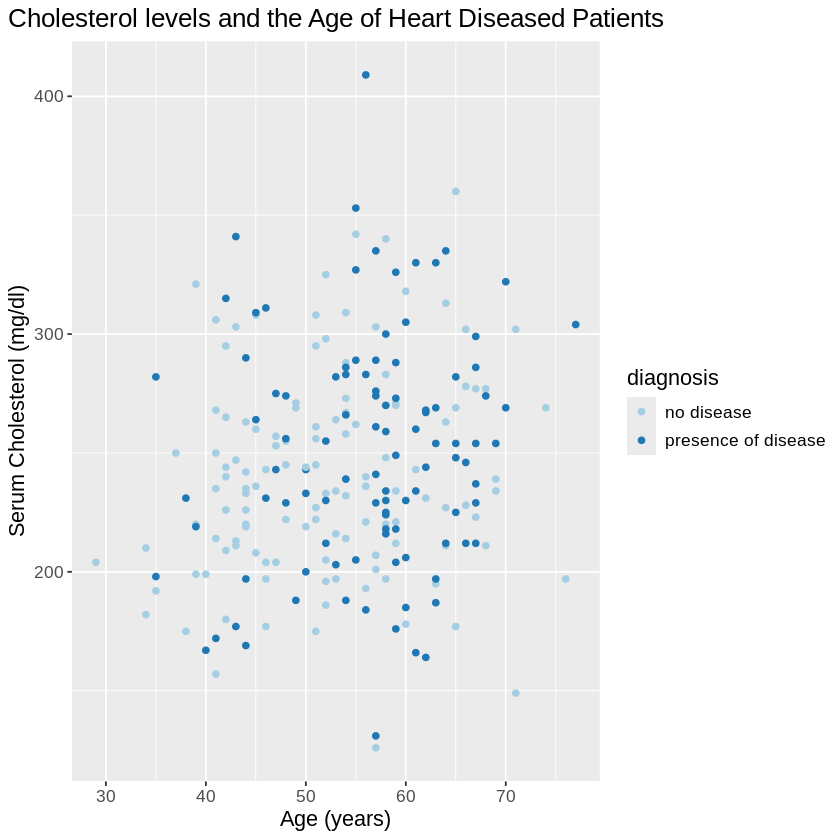

In [13]:
#Creating a scatter plot using training data
cleveland_plot <- cleveland2 |>
                    ggplot(aes(x = age, y = chol, color = as_factor(diag))) +
                    geom_point() +
                    labs(x = "Age (years)", y = "Serum Cholesterol (mg/dl)", 
                         title = "Cholesterol levels and the Age of Heart Diseased Patients",
                        color = "diagnosis") +
                    theme(text = element_text(size = 13)) +
                    theme(plot.title=element_text(hjust = 0.5)) +
                    scale_color_brewer(palette = "Paired")
cleveland_plot

Figure 1. We chose scatterplots because it makes it easy to identify the relationship between two variables. We combined all types of patients that share a common characteristic of either having the disease or not. This exploratory analysis will help address our question of “Can age and cholesterol levels be used to predict if an individual has a heart disease?” This is shown by separating the two variables into two colours. These two variables make clear predictors since they visibly show trends of age concerning cholesterol levels. 

## Methods

We applied initial_split() to split our data frame into 75% training data and 25% testing data. We only used the training data for analysis. To conduct our data analysis, we will plot the cholesterol levels against the age of the patients using a scatter plot, and then colour the data points based on the presence of cardiovascular disease in the patient. Using cholesterol as a predictor, we will then analyze the effect that cholesterol levels have on the development of cardiovascular disease. diag represents the diagnosis of heart disease consisting of values of 0 means < 50% diameter narrowing (absence of disease) and 1,2, and 3 means > 50% diameter narrowing (presence of disease). Cholesterol is in mg/dl and age in years.

## Discussion

In summary, the results from our exploratory data analysis visualization (Fig. 1) showed that there is a weakly positive relationship between high cholesterol levels and age, in terms of the presence of heart disease. It was observed that the majority of data points classified as ‘presence of disease’ (dark blue points) in the patient diagnosis were concentrated towards the upper right corner of the scatterplot, where patients generally aged between 50 years and 70 years, and cholesterol levels were greater than 200 mg/dl. Additionally, the ‘no disease’ patient diagnosis data points (shown in light blue) followed a pattern of being more populated towards the bottom left corner of the scatterplot, where most patients were aged less than 50 years and had lower cholesterol levels relative to the ‘presence of disease’ classified patients. Therefore, we were able to use the Cleveland heart disease dataset from the UC Irvine (UCI) Machine Learning Repository to answer our predictive question “Can age and cholesterol levels be used to predict if an individual has a heart disease”.

This correlation was what we expected to find as prior literature indicated that cholesterol levels greater than 200 mg/dl and increasing age are both important attributes that can predict the presence of heart disease (Karthick et al., 2022). 

These such findings highlight the adverse effects of high cholesterol in conjunction with age on the human heart. Thus, these results will hopefully encourage individuals to adopt behaviours conducive to maintaining lower cholesterol levels in their daily lives to lower the possibility of heart disease at a young age. 

These findings may lead to important future questions such as ‘What could someone do/avoid to decrease cholesterol levels?’, ‘What other factors may contribute to a higher risk of heart disease?’, and ‘What other short and long-term physical effects can be associated with cholesterol?’.  

## Bibliography

Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X

Karthick, K., Aruna, S. K., Samikannu, R., Kuppusamy, R., Teekaraman, Y., & Thelkar, A. R. (2022). Implementation of a Heart Disease Risk Prediction Model Using Machine Learning. Computational and mathematical methods in medicine, 2022, 6517716. https://doi.org/10.1155/2022/6517716 